In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pickle
import pathlib
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

import sys
try:
    sys.path.append('/media/nahuel-ofi/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings_v3 import *
except:
    sys.path.append('/media/nahuel/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings_v3 import *
    
    
fig_dir = '../figs'

In [15]:
net_dir_name = '../networks/BA'

N_values = [125, 250, 500, 1000, 2000]#, 4000, 8000]
m = 2
max_seed_by_N = [2000, 1000, 600, 400, 42]#, 12, 1]

attacks = ['BtwU', 'DegU', 'Ran']
meassures = ['meanS', 'meanS2', 'binder', 'binder2']

Ngcc_values = {}
Nsec_values = {}
delta2_btw_sum = {}
btw_sum = {}
btw_mean = {}
btw_std = {}
btw_CV = {}
spin_sum = {}
finiteSizeMeassures = {}
for meassure in meassures:
    finiteSizeMeassures[meassure] = {}


mean_Ngcc_values = {}
mean_Nsec_values = {}
mean_delta2_btw_sum = {}
mean_btw_sum = {}
mean_btw_mean = {}
mean_btw_std = {}
mean_btw_CV = {}
mean_spin_sum = {}
mean_finiteSizeMeassures = {}
for meassure in meassures:
    mean_finiteSizeMeassures[meassure] = {}
    
for N, max_seed in zip(N_values, max_seed_by_N):

    Ngcc_values[N] = {}
    Nsec_values[N] = {}
    delta2_btw_sum[N] = {}
    btw_sum[N] = {}
    btw_mean[N] = {}
    btw_std[N] = {}
    btw_CV[N] = {}
    spin_sum[N] = {}
    for meassure in meassures:
        finiteSizeMeassures[meassure][N] = {}
    
    mean_Ngcc_values[N] = {}
    mean_Nsec_values[N] = {}
    mean_delta2_btw_sum[N] = {}
    mean_btw_sum[N] = {}
    mean_btw_mean[N] = {}
    mean_btw_std[N] = {}
    mean_btw_CV[N] = {}
    mean_spin_sum[N] = {}
    for meassure in meassures:
        mean_finiteSizeMeassures[meassure][N] = {}

    for attack in attacks:
        
        Ngcc_values[N][attack] = []
        Nsec_values[N][attack] = []
        delta2_btw_sum[N][attack] = []
        btw_sum[N][attack] = []
        btw_mean[N][attack] = []
        btw_std[N][attack] = []
        btw_CV[N][attack] = []
        spin_sum[N][attack] = []
        for meassure in meassures:
            finiteSizeMeassures[meassure][N][attack] = []
        
        for seed in range(max_seed):
                       
            network = 'BA_N{}_m{}_{:05d}'.format(N, m, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_Ngcc_file_name  = os.path.join(attack_dir_name, 'Ngcc_values.txt')
            aux = np.loadtxt(full_Ngcc_file_name, dtype=float)
            _Ngcc_values = aux[:,0]
            _Nsec_values = aux[:,1]
            
            full_deltaBtw_file_name  = os.path.join(attack_dir_name, 'deltaBtw.txt')
            _delta2_btw_sum = np.loadtxt(full_deltaBtw_file_name)
            
            #full_btw_file_name  = os.path.join(attack_dir_name, 'btwOrderParam.txt')
            #aux = np.loadtxt(full_btw_file_name)

            #_btw_sum = aux[:,0]
            #_spin_sum = aux[:,1]
            
            full_btw_dist_data_name  = os.path.join(attack_dir_name, 'btwDistParameters.txt')
            aux = np.loadtxt(full_btw_dist_data_name)

            _btw_mean = aux[:,0]
            _btw_std = aux[:,1]
            _btw_CV = _btw_std / _btw_mean
            
            full_finiteSizeMeassures_file_name  = os.path.join(attack_dir_name, 'finiteClusters.txt')
            _finiteSizeMeassures = np.loadtxt(full_finiteSizeMeassures_file_name, dtype=float)
            
            Ngcc_values[N][attack].append(_Ngcc_values)
            Nsec_values[N][attack].append(_Nsec_values)
            delta2_btw_sum[N][attack].append(_delta2_btw_sum)
            btw_mean[N][attack].append(_btw_mean)
            btw_std[N][attack].append(_btw_std)
            btw_CV[N][attack].append(_btw_CV)
            #btw_sum[N][attack].append(_btw_sum)
            #spin_sum[N][attack].append(_spin_sum)
            
            finiteSizeMeassures['meanS'][N][attack].append(_finiteSizeMeassures[:,0])
            finiteSizeMeassures['meanS2'][N][attack].append(_finiteSizeMeassures[:,1])
            finiteSizeMeassures['binder'][N][attack].append(_finiteSizeMeassures[:,2])
            finiteSizeMeassures['binder2'][N][attack].append(_finiteSizeMeassures[:,3])

        mean_Ngcc_values[N][attack] = np.mean(Ngcc_values[N][attack], axis=0)
        mean_Nsec_values[N][attack] = np.mean(Nsec_values[N][attack], axis=0)
        mean_delta2_btw_sum[N][attack] = np.mean(delta2_btw_sum[N][attack], axis=0)
        mean_btw_mean[N][attack] = np.mean(btw_mean[N][attack], axis=0)
        mean_btw_std[N][attack] = np.mean(btw_std[N][attack], axis=0)
        mean_btw_CV[N][attack] = np.mean(btw_CV[N][attack], axis=0)
        #mean_btw_sum[N][attack] = np.mean(btw_sum[N][attack], axis=0)
        #mean_spin_sum[N][attack] = np.mean(spin_sum[N][attack], axis=0)
        for meassure in meassures:
            mean_finiteSizeMeassures[meassure][N][attack] = np.mean(finiteSizeMeassures[meassure][N][attack], axis=0)

/home/nahuel/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel/__main__.py:99: RuntimeWarning: invalid value encountered in true_divide


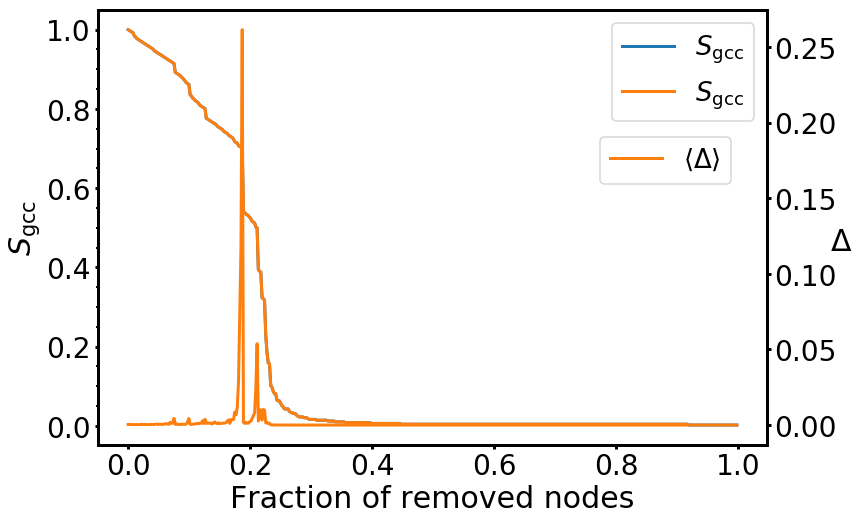

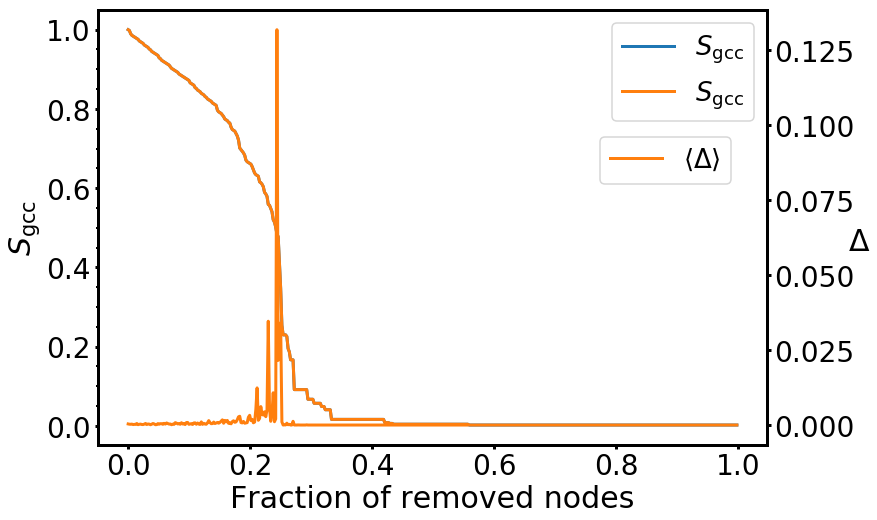

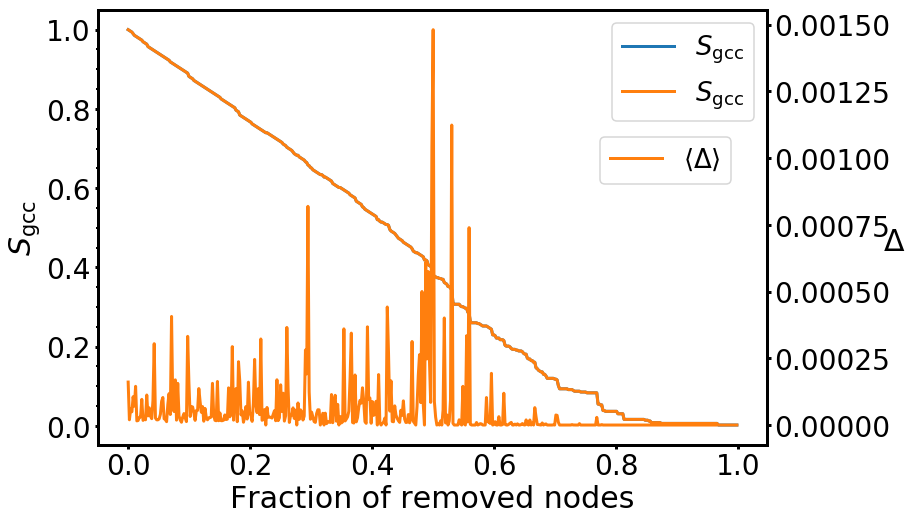

In [30]:
for attack in attacks:

    Ngcc0 = int(Ngcc_values[N][attack][0][0])
    
    fig, axes = plt.subplots(figsize=(12, 8))
    ax = axes
    ax.set_ylabel(r'$S_{\mathrm{gcc}}$')
    ax.set_xlabel('Fraction of removed nodes')
    X1 = np.arange(Ngcc0) / Ngcc0
    Y1 = Ngcc_values[N][attack][0][:Ngcc0] / Ngcc0
    Y2 = Ngcc_values[N][attack][1][:Ngcc0] / Ngcc0
    ax.plot(X1, Y1, label=r'$S_{\mathrm{gcc}}$')
    ax.plot(X1, Y2, label=r'$S_{\mathrm{gcc}}$')
    ax.legend(loc='best')
    
    #ax.set_xlim(0.1, 0.3)

    ax2 = ax.twinx()
    ax2.set_ylabel(r'$\Delta$', rotation=0)
    
    X2 = np.arange(len(delta2_btw_sum[N][attack][0])) / Ngcc0
    Y2 = delta2_btw_sum[N][attack][0]
    if False:
        ax2.set_yscale('log')
        Y2[Y2==0] = np.NaN
    ax2.plot(X2, Y2, color=colors[1], label=r'$\langle \Delta \rangle$')

    ax2.legend(loc=(0.75, 0.6))
    #ax2.set_ylim(10E-8, 1)
    fig_base_name = 'Btw_change_ER_N{}_p{}_{}'.format(N, p, attack)

    plt.show()

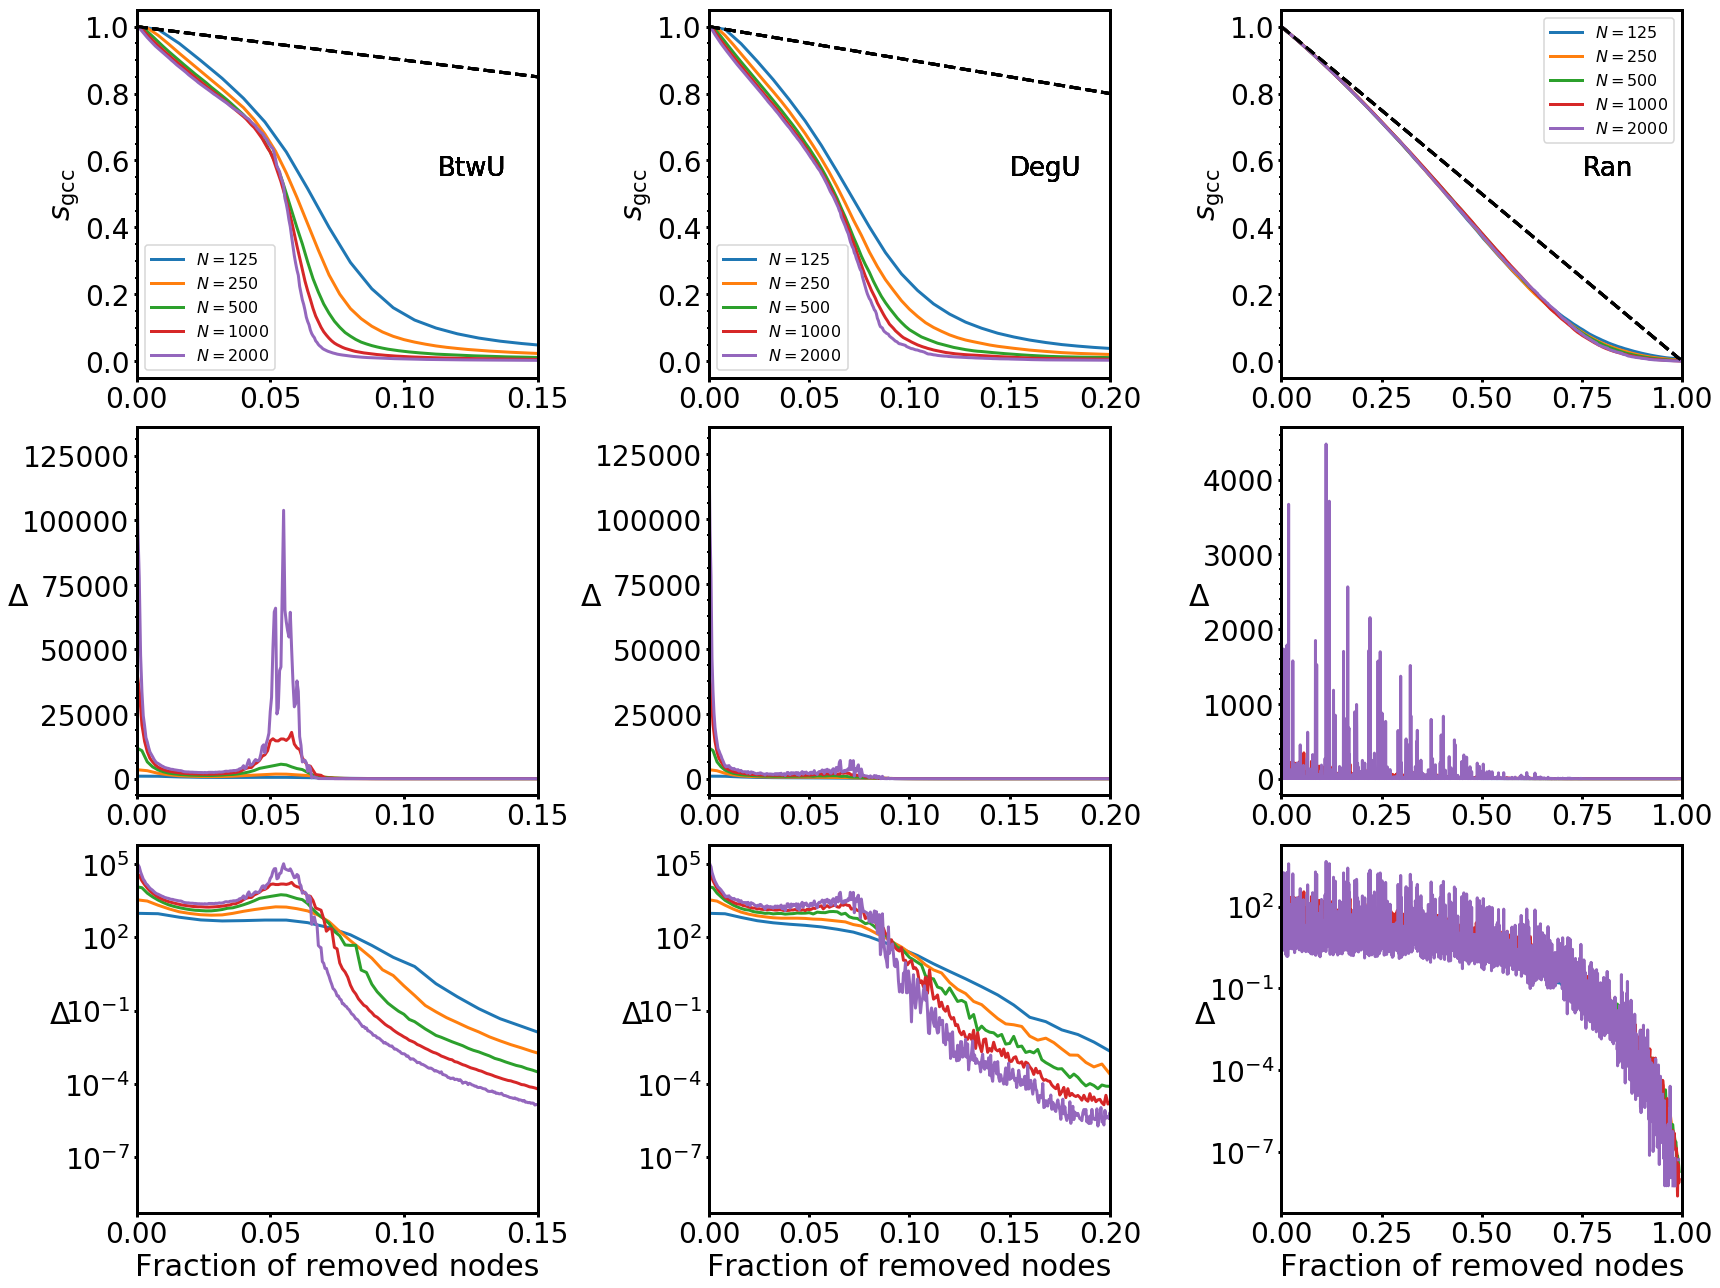

In [20]:
fig, axes = plt.subplots(figsize=(24, 18), ncols=3, nrows=3)

x_lims = [(0, 0.15), (0, 0.2), (0, 1)]

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[0][i]
        ax.set_ylabel(r'$s_{\mathrm{gcc}}$')
        #ax.set_xlabel('Fraction of removed nodes')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(x_lims[i])
        ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
        
        line_x = np.arange(0, 1.01, 0.01)
        line_y = 1 - line_x
        ax.plot(line_x, line_y, '--', color='k')
        
        ax.text(0.75, 0.55, attack, transform=ax.transAxes, fontsize=26)
        #ax.set_xlim(0.20, 0.25)
        ax.legend(loc='best', fontsize=16)

        #ax.set_xlim(0.1, 0.3)
                      
        ax = axes[1][i]
        #ax.set_xlabel('Fraction of removed nodes')
        ax.set_xlabel('')
        ax.set_ylabel(r'$\Delta$', rotation=0)
        ax.set_xlim(x_lims[i])
        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(0.))
        #Y2 = mean_delta2_btw_sum[N][attack] / (mean_Ngcc_values[N][attack]**2)
        if N <= 4000:
            ax.plot(X2, Y2)
        
        ax = axes[2][i]
        ax.set_xlabel('Fraction of removed nodes')
        ax.set_ylabel(r'$\Delta$', rotation=0)
        ax.set_xlim(x_lims[i])
        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        Y2 = mean_delta2_btw_sum[N][attack] / ((Ngcc0**2)*N**(0.))
        #Y2 = mean_delta2_btw_sum[N][attack] / (mean_Ngcc_values[N][attack]**2)
        
        ax.set_yscale('log')
        Y2[Y2==0] = np.NaN
        ax.plot(X2, Y2)
        #ax2.set_ylim(10E-8, 1)

plt.tight_layout()
fig_base_name = 'Btw_change_BA'
#plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
#plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

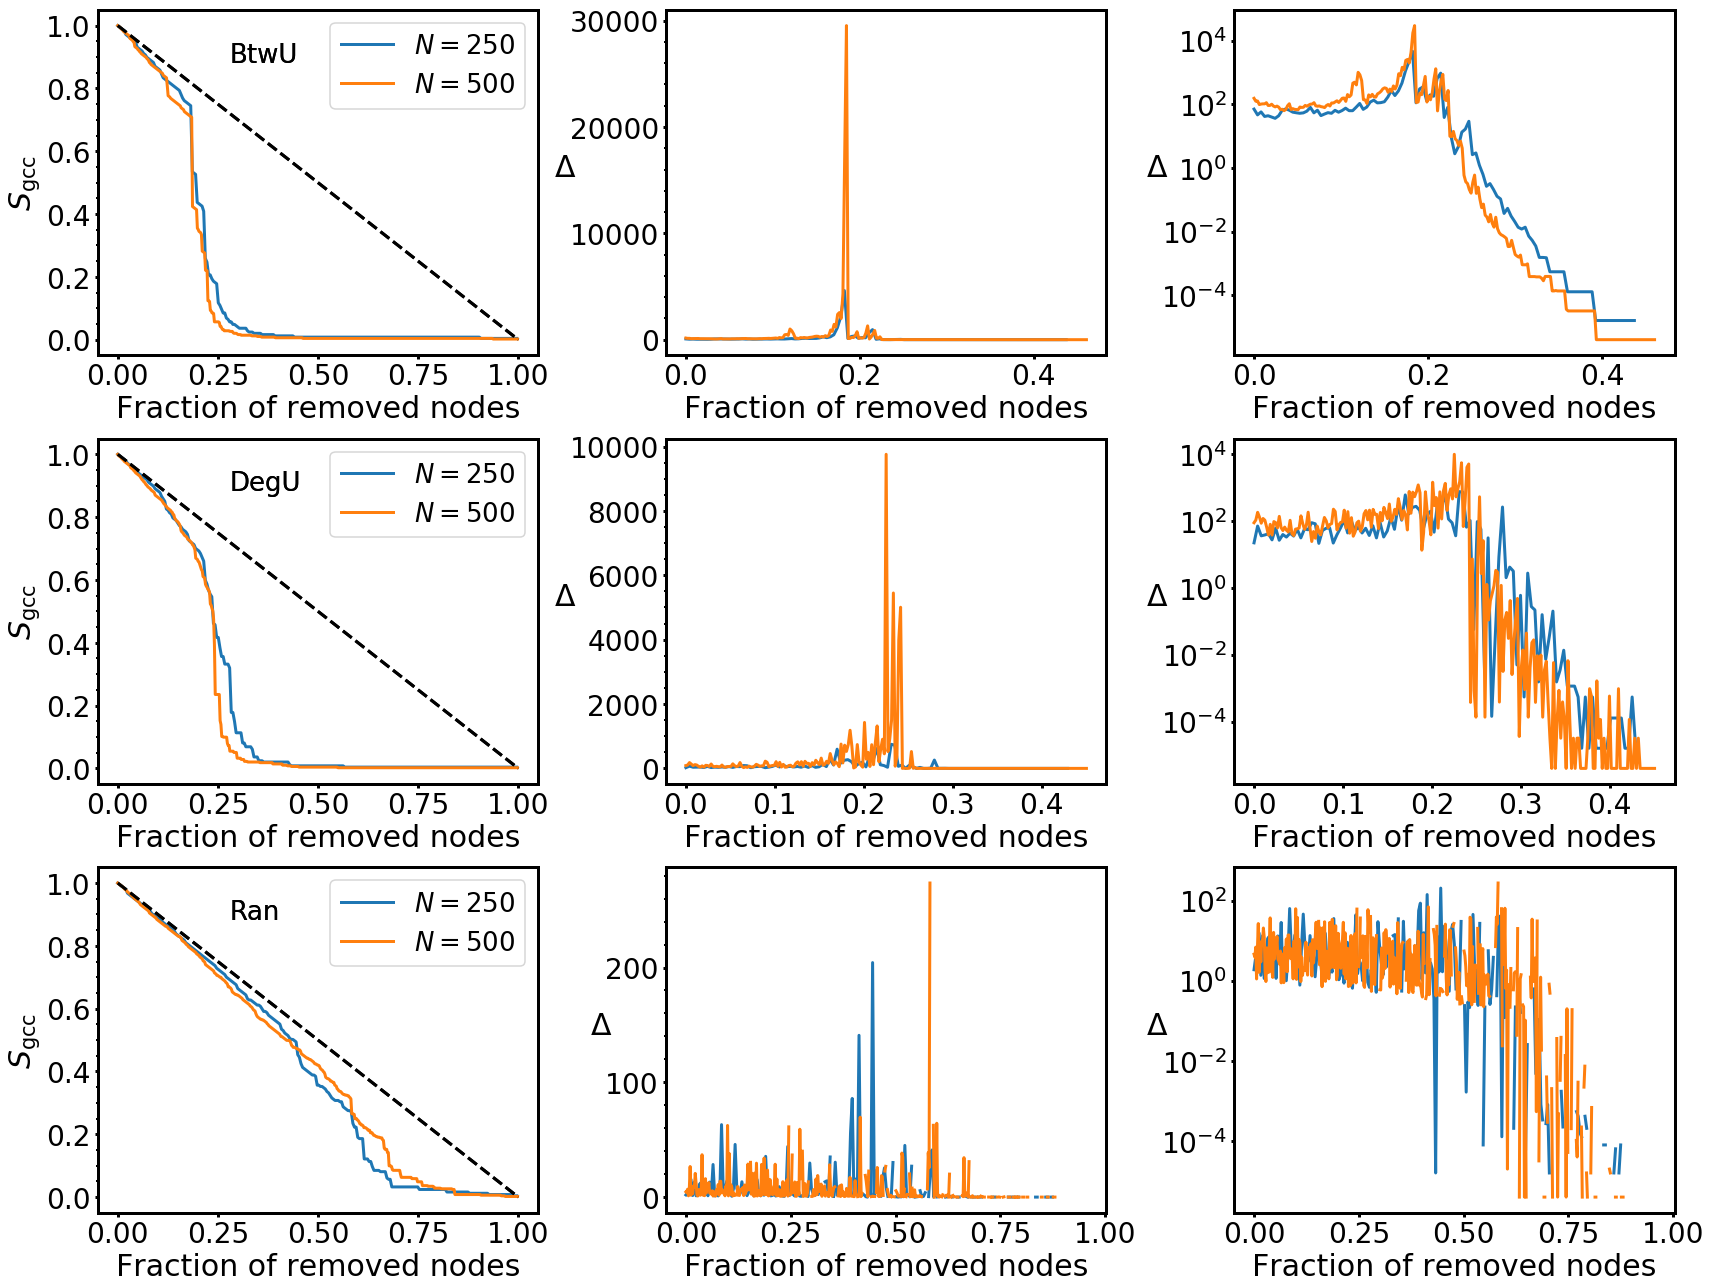

In [60]:
fig, axes = plt.subplots(figsize=(24, 18), ncols=3, nrows=3)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(Ngcc_values[N][attack][0][0])
        
        ax = axes[i][0]
        ax.set_ylabel(r'$S_{\mathrm{gcc}}$')
        ax.set_xlabel('Fraction of removed nodes')
        X1 = np.arange(Ngcc0) / Ngcc0
        Y1 = Ngcc_values[N][attack][0][:Ngcc0] / Ngcc0
        ax.plot(X1, Y1, label=r'$N = $' + '{}'.format(N))
        
        line_x = np.arange(0, 1.01, 0.01)
        line_y = 1 - line_x
        ax.plot(line_x, line_y, '--', color='k')
        
        ax.text(0.3, 0.85, attack, transform=ax.transAxes, fontsize=26)
        
        ax.legend(loc='best')

        #ax.set_xlim(0.1, 0.3)

        ax = axes[i][1]
        ax.set_xlabel('Fraction of removed nodes')
        ax.set_ylabel(r'$\Delta$', rotation=0)

        X2 = np.arange(len(delta2_btw_sum[N][attack][0])) / Ngcc0
        Y2 = delta2_btw_sum[N][attack][0] / N**2
        if N <= 4000:
            ax.plot(X2, Y2)
        
        ax = axes[i][2]
        ax.set_xlabel('Fraction of removed nodes')
        ax.set_ylabel(r'$\Delta$', rotation=0)

        X2 = np.arange(len(delta2_btw_sum[N][attack][0])) / Ngcc0
        Y2 = delta2_btw_sum[N][attack][0] / N**2
        ax.set_yscale('log')
        Y2[Y2==0] = np.NaN
        ax.plot(X2, Y2)
        #ax2.set_ylim(10E-8, 1)

plt.tight_layout()
fig_base_name = 'Btw_change_ER'
#plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
#plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

/home/nahuel/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: divide by zero encountered in true_divide


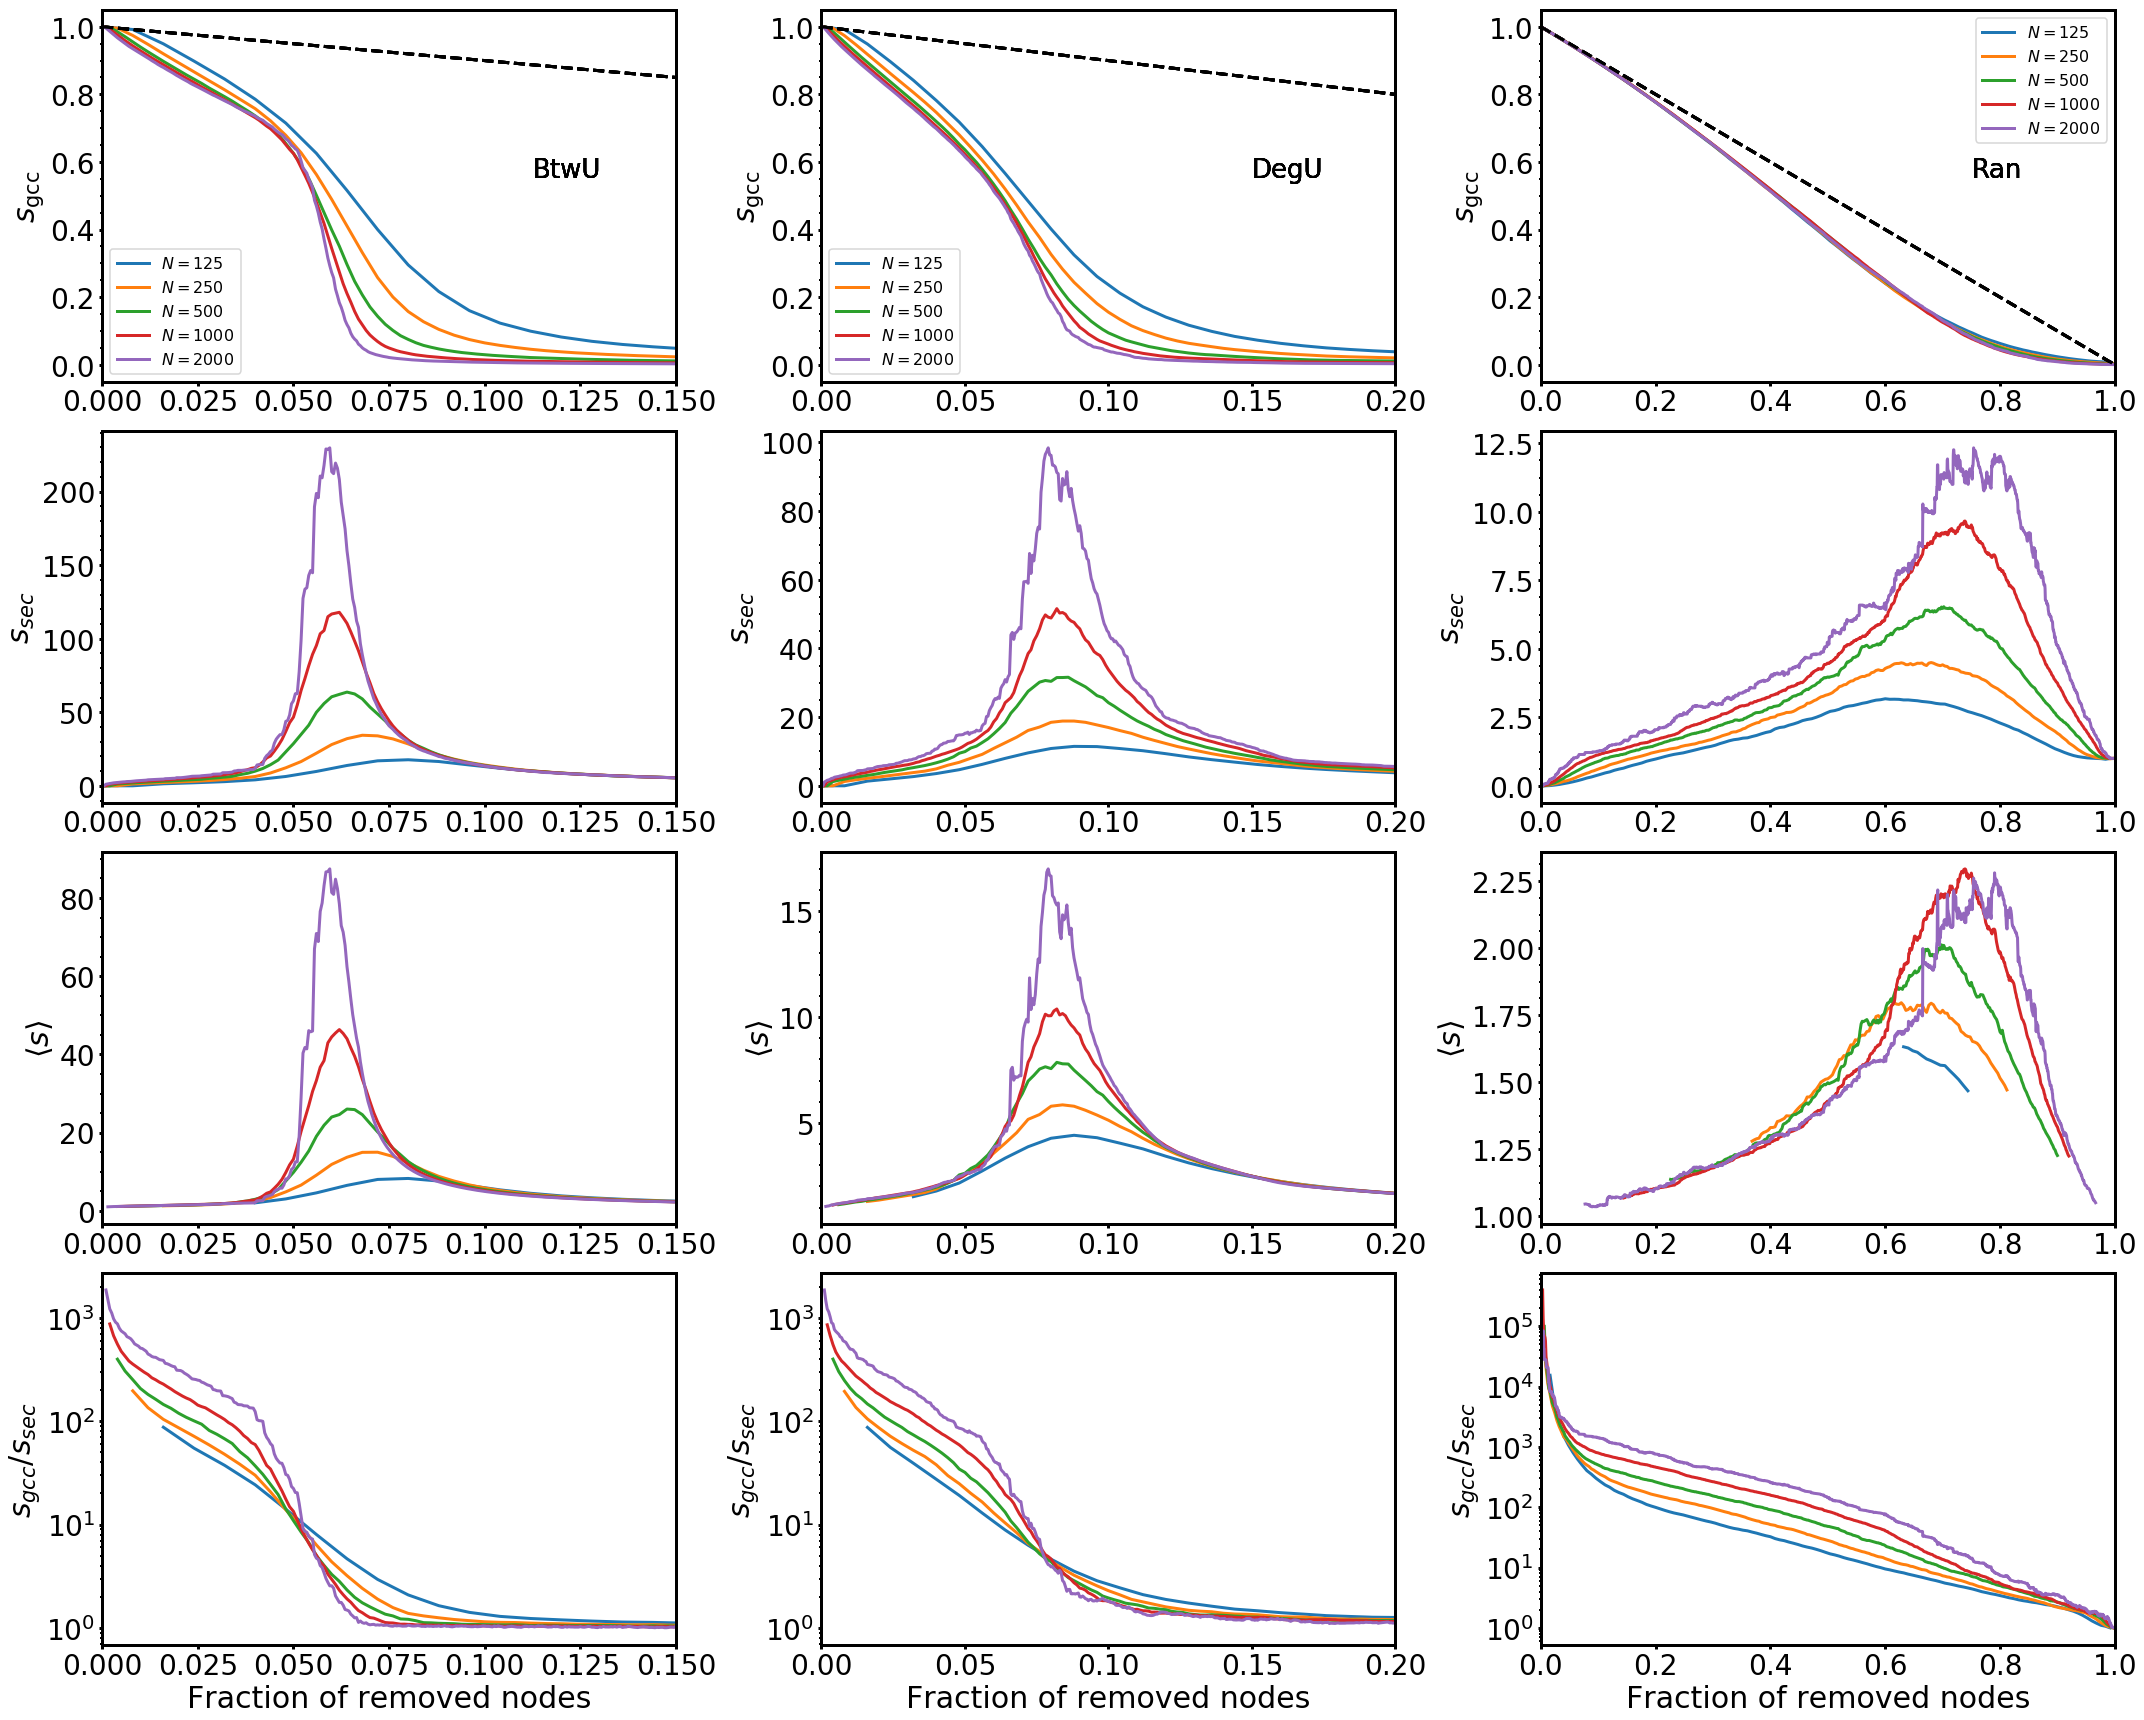

In [19]:
xlims = [(0, 0.15), (0, 0.2), (0, 1)]

fig, axes = plt.subplots(figsize=(30, 24), ncols=3, nrows=4)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[0][i]
        ax.set_ylabel(r'$s_{\mathrm{gcc}}$')
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
        
        line_x = np.arange(0, 1.01, 0.01)
        line_y = 1 - line_x
        ax.plot(line_x, line_y, '--', color='k')
        
        ax.text(0.75, 0.55, attack, transform=ax.transAxes, fontsize=26)
        
        ax.legend(loc='best', fontsize=16)

        
        ax = axes[1][i]
        ax.set_ylabel(r'$s_{sec}$')
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Nsec_values[N][attack][:Ngcc0]
        if i == 0:
            ax.plot(X, Y)
        elif i == 1:
            ax.plot(X, Y)
        elif i == 2:
            ax.plot(X, Y)
        
        ax = axes[2][i]
        ax.set_ylabel(r'$\langle s \rangle$')
        ax.set_xlabel('')
        ax.set_xlim(xlims[i]) 
        X = np.arange(Ngcc0) / Ngcc0
        Y1 = mean_finiteSizeMeassures['meanS'][N][attack][:Ngcc0]
        Y2 = mean_finiteSizeMeassures['meanS2'][N][attack][:Ngcc0]
        Y3 = mean_finiteSizeMeassures['binder'][N][attack][:Ngcc0]
        Y4 = mean_finiteSizeMeassures['binder2'][N][attack][:Ngcc0]
        if i == 0:
            ax.plot(X, Y1)
            #ax.plot(X, Y2)
            #ax.plot(X, Y3)
            #ax.plot(X, Y4)
        elif i == 1:
            ax.plot(X, Y1)
            #ax.plot(X, Y2)
            #ax.plot(X, Y3)
            #ax.plot(X, Y4)
        elif i == 2:
            ax.plot(X, Y1)
            #ax.plot(X, Y2)
            #ax.plot(X, Y3)
            #ax.plot(X, Y4)
            
        ax.set_xlim(xlims[i])
        
        ax = axes[3][i]
        ax.set_ylabel(r'$s_{gcc} / s_{sec}$')
        ax.set_xlabel('Fraction of removed nodes')
        #ax.set_xscale('log')
        ax.set_yscale('log')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / mean_Nsec_values[N][attack][:Ngcc0]
        ax.plot(X, Y)

        ax.set_xlim(xlims[i])        

plt.tight_layout()
fig_base_name = 'Btw_change_BA'
#plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
#plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

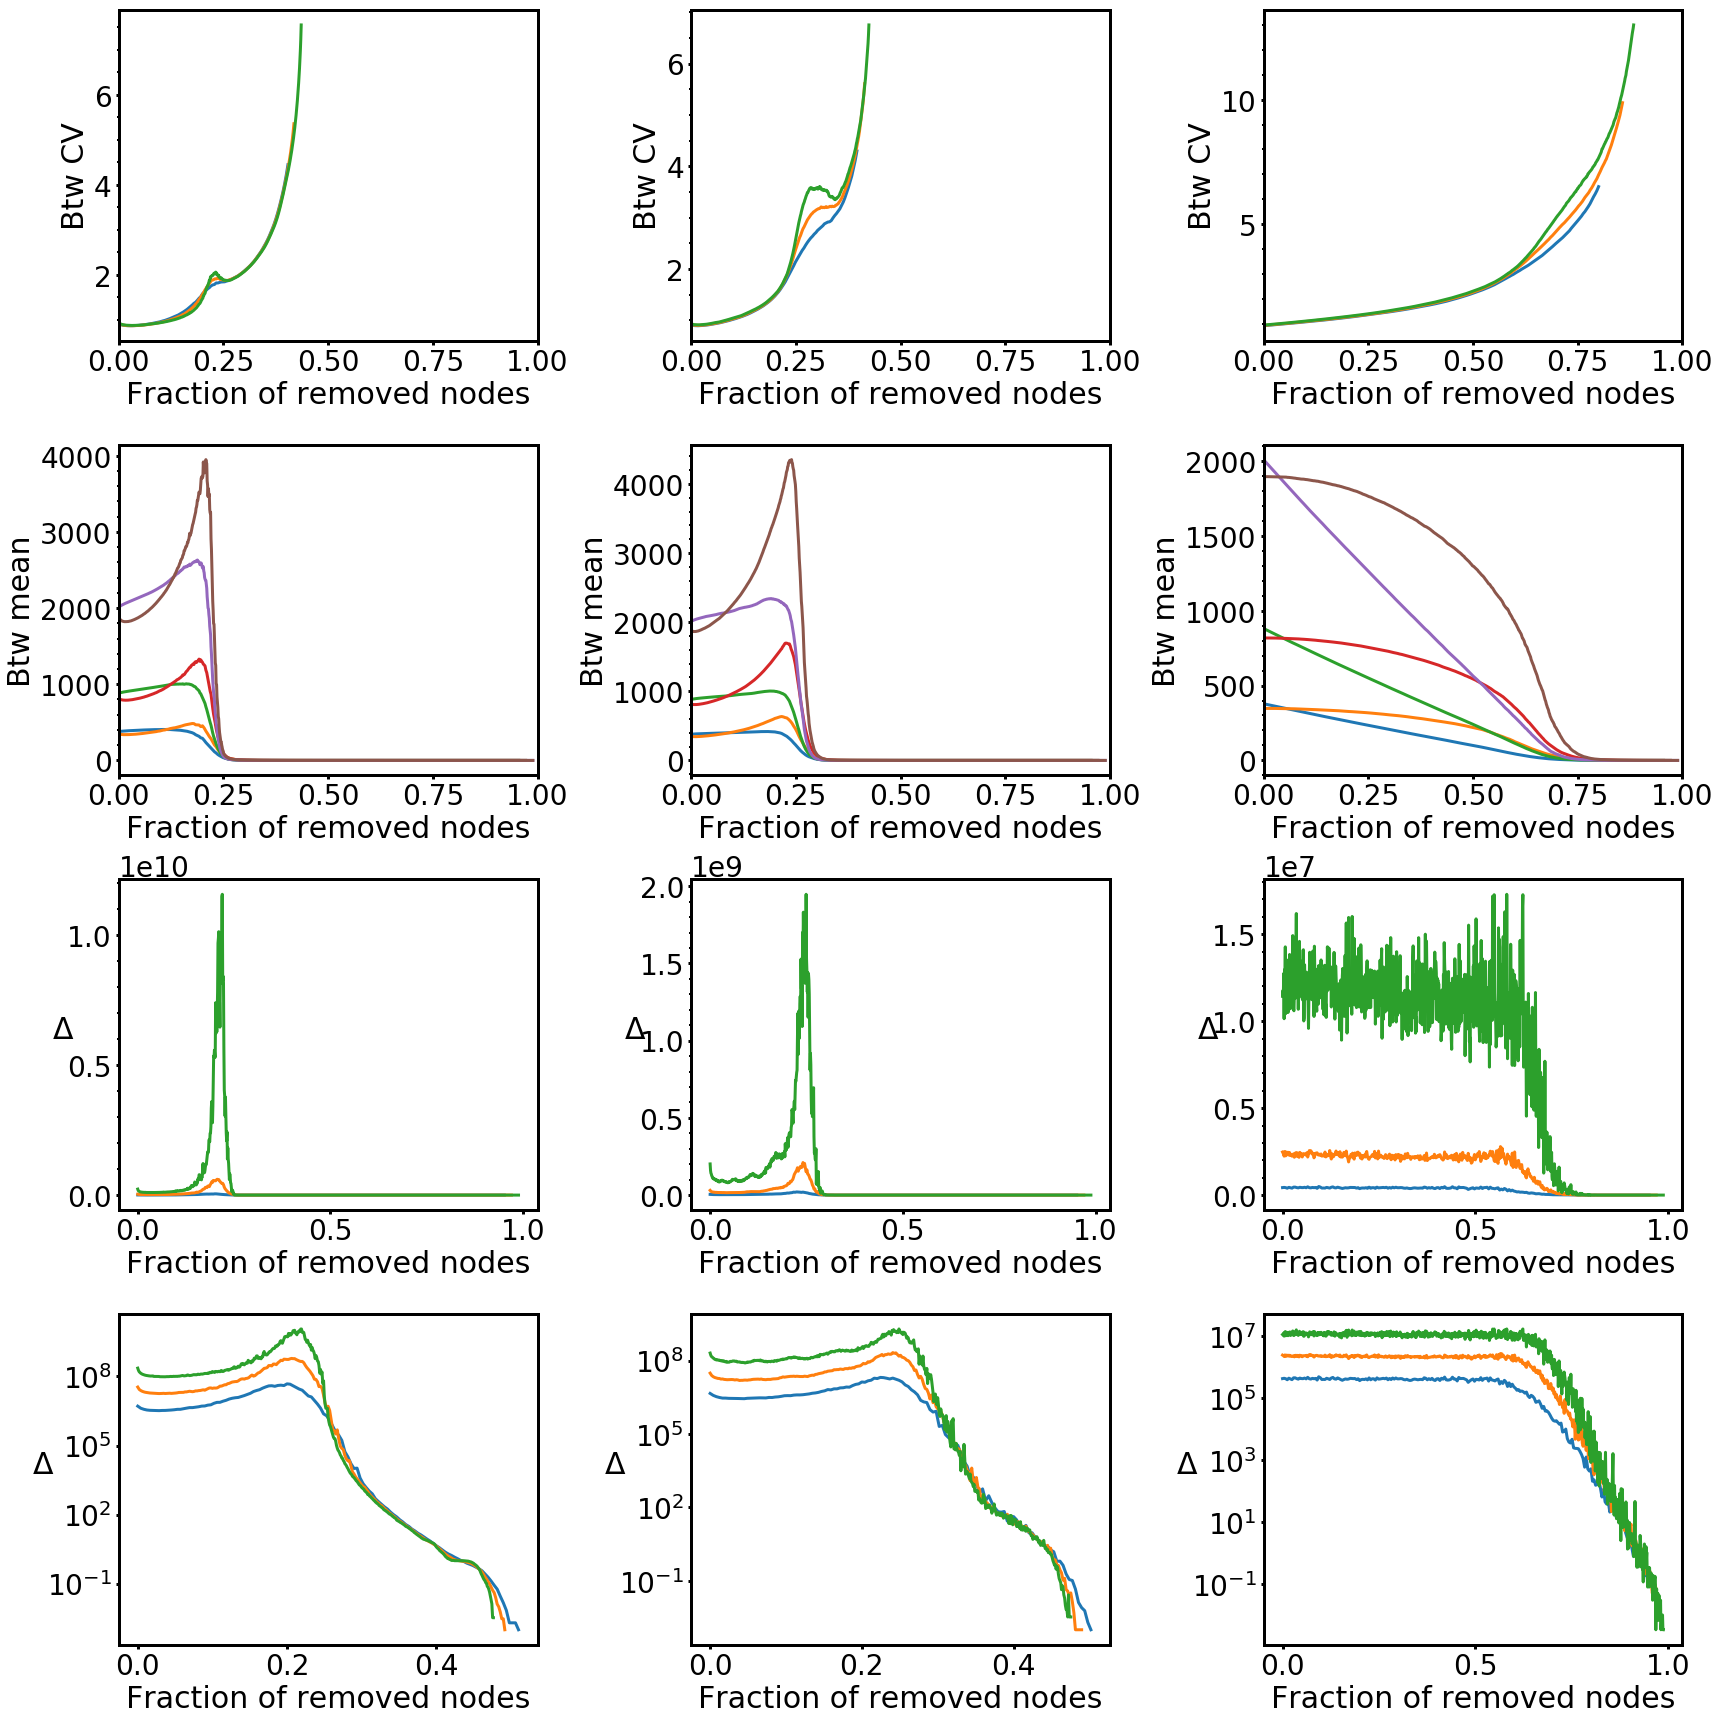

In [81]:
fig, axes = plt.subplots(figsize=(24, 24), ncols=3, nrows=4)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
                
        ax = axes[0][i]
        ax.set_ylabel(r'Btw CV')
        ax.set_xlabel('Fraction of removed nodes')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_CV[N][attack][:Ngcc0]
        ax.set_xlim(0, 1)
        ax.plot(X, Y)
        
        
        ax = axes[1][i]
        ax.set_ylabel(r'Btw mean')
        ax.set_xlabel('Fraction of removed nodes')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_mean[N][attack][:Ngcc0]
        Y2 = mean_btw_std[N][attack][:Ngcc0]
        ax.set_xlim(0, 1)
        ax.plot(X, Y)
        ax.plot(X, Y2)
        
                      
        ax = axes[2][i]
        ax.set_xlabel('Fraction of removed nodes')
        ax.set_ylabel(r'$\Delta$', rotation=0)

        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        Y2 = mean_delta2_btw_sum[N][attack]
        if N <= 4000:
            ax.plot(X2, Y2)
        
        ax = axes[3][i]
        ax.set_xlabel('Fraction of removed nodes')
        ax.set_ylabel(r'$\Delta$', rotation=0)

        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        Y2 = mean_delta2_btw_sum[N][attack]
        ax.set_yscale('log')
        Y2[Y2==0] = np.NaN
        ax.plot(X2, Y2)
        #ax2.set_ylim(10E-8, 1)

plt.tight_layout()
fig_base_name = 'Btw_change_ER'
#plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
#plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()